In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ds=pd.read_csv("/content/breastcancer.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/breastcancer.csv'

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

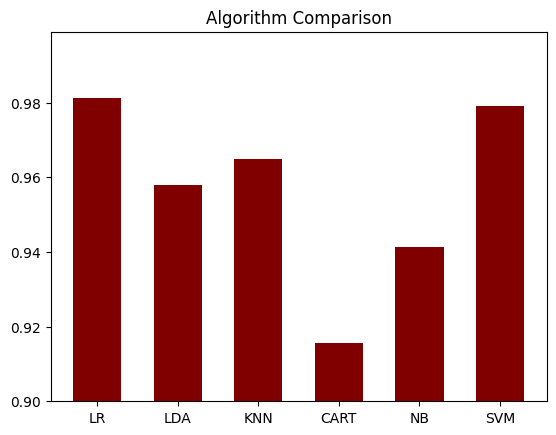

['M']


In [ ]:
#ds['diagnosis']=ds['diagnosis'].map({'B':0,'M':1}).astype(int)
print(ds.head)
x=ds.iloc[:,2:32].values
x
y=ds.iloc[:,1].values
y
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
print(x_train)
print(x_test)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='auto')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma= 'auto')))
print(models)
results = []
names = []
res = []
for name, model in models:
  Kfold = StratifiedKFold(n_splits=10, random_state=None)
  cv_results = cross_val_score(model, x_train, y_train, cv=Kfold, error_score='raise')
  results.append(cv_results)
  names.append(name)
  res.append(cv_results.mean())
  print('%s: %f' % (name, cv_results.mean()))

plt.ylim(.900, .999)
plt.bar(names, res, color ='maroon', width = 0.6)
plt.title('Algorithm Comparison')
plt.show()
model = LogisticRegression (solver='liblinear', multi_class="auto")
model.fit(x_train, y_train)
value = [[17.99,10.38, 122.8,1001,0.1184,0.2776,0.3001, 0.1471,0.2419,8.87871, 1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,	0.03003,	0.006193,	25.38,	17.33,	184.6,	2019,	0.1622,	0.6656,	0.7119,	0.2654,	0.4601,	0.1189]]
y_pred = model.predict(value)
print(y_pred)